Length of QTable: 203
[1, 0, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 180, 90]
Qlearning_data/QTable_Alpha_0_08_Gamma_1_Decay_0_99.json


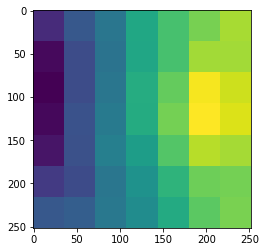

Length of QTable: 202
[3, 4, 0, 1, 2, 5, 6]
[0, 2, 3, 4, 5, 6, 1]
[0, 270, 90, 180]
Qlearning_data/QTable_Alpha_0_08_Gamma_0_8_Decay_0_99.json


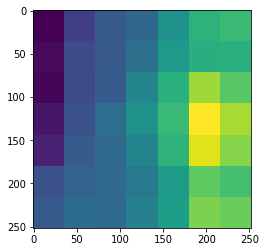

Length of QTable: 203
[1, 0, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 180, 90]
Qlearning_data/QTable_Alpha_0_08_Gamma_1_Decay_0_99.json


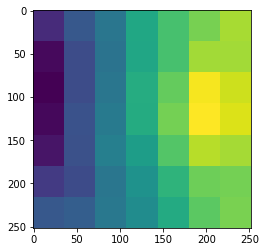

Length of QTable: 201
[1, 0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 1, 5, 6]
[0, 90, 270, 180]
Qlearning_data/QTable_Alpha_0_01_Gamma_1_Decay_0_99.json


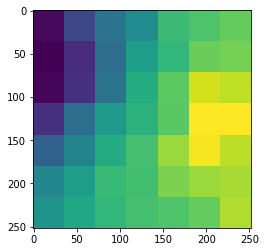

Length of QTable: 204
[1, 0, 2, 3, 4, 5, 6]
[0, 2, 1, 3, 4, 5, 6]
[0, 270, 180, 90]
Qlearning_data/QTable_Alpha_0_08_Gamma_0_5_Decay_0_99.json


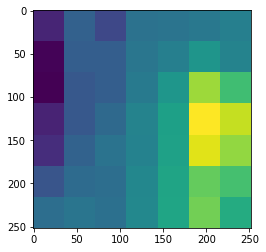

Length of QTable: 201
[1, 2, 0, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 90, 180]
Qlearning_data/QTable_Alpha_0_01_Gamma_0_8_Decay_0_99.json


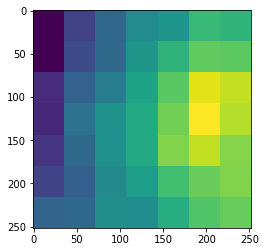

Length of QTable: 201
[2, 4, 5, 6, 3, 1, 0]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 180, 90]
Qlearning_data/QTable_Alpha_0_01_Gamma_0_5_Decay_0_99.json


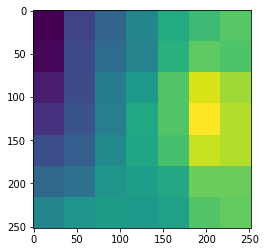

Length of QTable: 201
[2, 1, 0, 3, 4, 5, 6]
[0, 2, 3, 4, 1, 5, 6]
[0, 180, 270, 90]
Qlearning_data/QTable_Alpha_0_1_Gamma_1_Decay_0_99.json


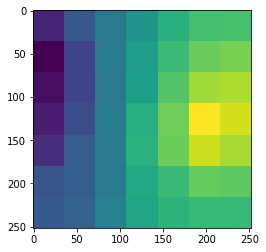

Length of QTable: 202
[3, 2, 0, 1, 5, 4, 6]
[0, 1, 2, 3, 5, 4, 6]
[0, 270, 90, 180]
Qlearning_data/QTable_Alpha_0_1_Gamma_0_8_Decay_0_99.json


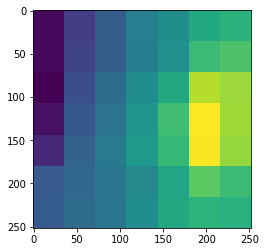

Length of QTable: 202
[1, 0, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 180, 90]
Qlearning_data/QTable_Alpha_0_1_Gamma_0_5_Decay_0_99.json


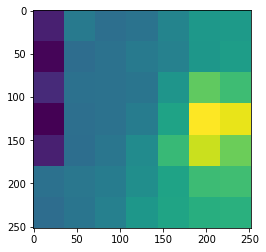

In [32]:
import math
import json
from pprint import pprint

file_list = [
    "Qlearning_data/QTable_Alpha_0_08_Gamma_1_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_08_Gamma_0_8_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_08_Gamma_1_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_01_Gamma_1_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_08_Gamma_0_5_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_01_Gamma_0_8_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_01_Gamma_0_5_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_1_Gamma_1_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_1_Gamma_0_8_Decay_0_99.json",
    "Qlearning_data/QTable_Alpha_0_1_Gamma_0_5_Decay_0_99.json"
]
for data in file_list:
    with open(data) as f:
        Qtable = json.load(f)
    print("Length of QTable: " + str(len(Qtable)))
    xs = []; zs = []; yaws = []
    for key in Qtable:
        values = key.split(":")
        x = int(values[0])
        z = int(values[1])
        yaw = int(values[2])
        if x not in xs: xs.append(x)
        if z not in zs: zs.append(z)
        if yaw not in yaws: yaws.append(yaw)
    
    print(xs); print(zs); print(yaws)
    import numpy as np 
    import matplotlib.pyplot as plt 
    xLen = max(xs); zLen = max(zs);  
    grid = np.ones(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])
    
        gridXStart = int(x*36)
        gridXEnd = int(x*36 + 36)
        gridZStart = int(z*36)
        gridZEnd = int(z*36 + 36)

        grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)
    
    ax = plt.axes()
    ax.imshow(grid)
    #grid.savefig('/Users/jonathan/Desktop/')
    #savefig(data)
    print(data)
    plt.show()

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_xticklabels([str(i) for i in range(xLen+1)])
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_yticklabels([str(i) for i in range(xLen+1)])
    

In [13]:
xs = []; zs = []; yaws = []
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    yaw = int(values[2])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
    
print(xs); print(zs); print(yaws)

[1, 0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 1, 5, 6]
[0, 90, 270, 180]


[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6')]

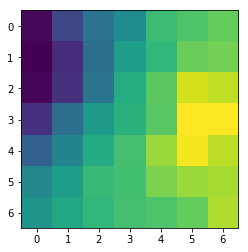

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
xLen = max(xs); zLen = max(zs);  
grid = np.ones(((xLen+1)*36,(zLen+1)*36))
block = np.ones((int(36),int(36)))

for key in Qtable:
    values = key.split(":")
    x = float(values[0])
    z = float(values[1])
    reward = max(Qtable[key])
    
    gridXStart = int(x*36)
    gridXEnd = int(x*36 + 36)
    gridZStart = int(z*36)
    gridZEnd = int(z*36 + 36)

    grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)
    
ax = plt.axes()
ax.imshow(grid)

ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)])
ax.set_xticklabels([str(i) for i in range(xLen+1)])
ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)])
ax.set_yticklabels([str(i) for i in range(xLen+1)])


Games:  200  - Average Time:  292.705


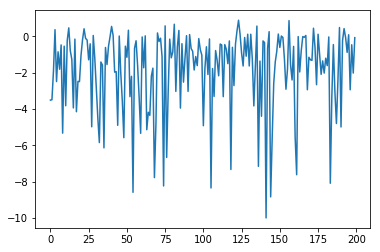

Games:  200  - Average Time:  301.525


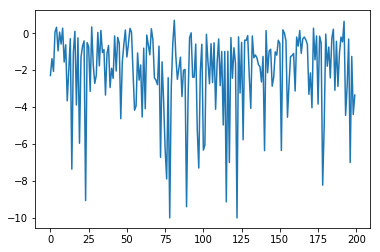

Games:  200  - Average Time:  291.8


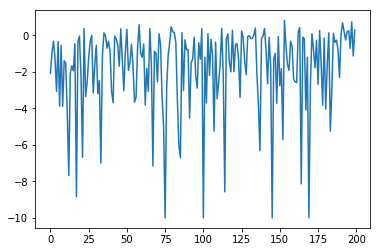

Games:  200  - Average Time:  277.64


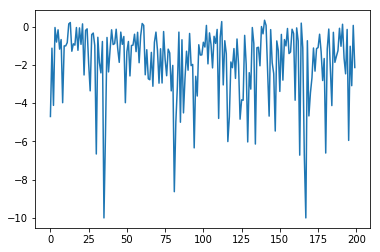

Games:  200  - Average Time:  319.155


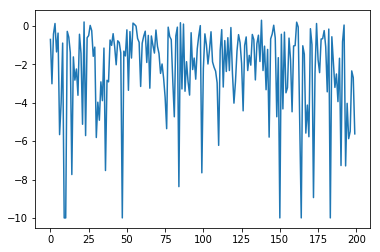

Games:  200  - Average Time:  314.93


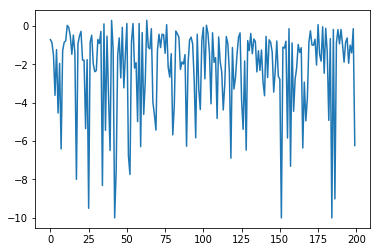

Games:  200  - Average Time:  322.63


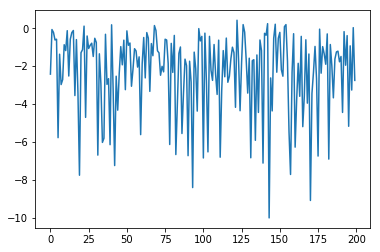

Games:  200  - Average Time:  301.44


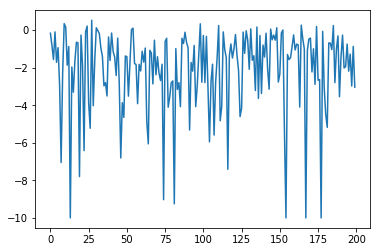

Games:  200  - Average Time:  314.565


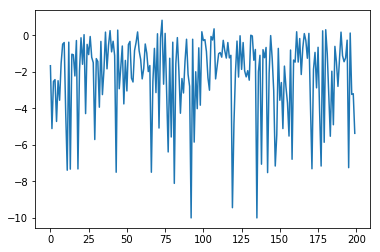

In [17]:
from matplotlib import pyplot as plt
from numpy import genfromtxt
import numpy as np

file_list = [
    "Qlearning_data/Results_Alpha_0_08_Gamma_0_8_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_08_Gamma_1_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_08_Gamma_0_5_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_01_Gamma_1_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_01_Gamma_0_8_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_01_Gamma_0_5_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_1_Gamma_1_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_1_Gamma_0_8_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_1_Gamma_0_5_Decay_0_99.csv"
]
for data in file_list:
    file = data
    my_data = genfromtxt(file, delimiter=',')
    y = [x[0] for x in my_data]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    print("Games: " , str(len(y)), " - Average Time: ", str(sum(time)/len(y)))
    plt.plot(y) # Plot shown when learning with epsilon decay at 0.99
    plt.show()

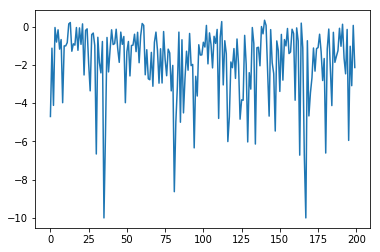

In [7]:
plt.plot(y) # Plot shown when learning with epsilon decay at 0.99

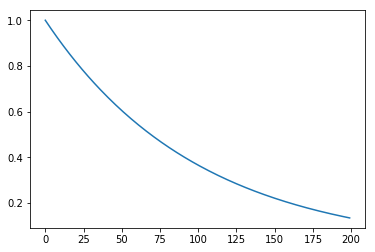

In [18]:
plt.plot(epsilon)

-3.4881818094916923


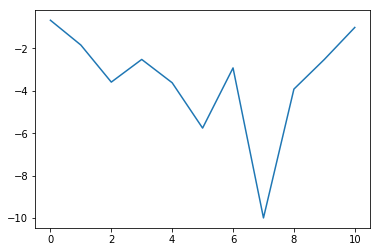

In [5]:
plt.plot(y) # Run when epsilon set to 0 and loaded from q table built from previous 2 runs
print(np.mean(y))